# En este ejercicio vamos a trabajar con un Dataframe.


In [61]:
! # Instalamos el paquete desde el interprete de comandos, porque no se encuentra en el container
! pip install lxml

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics        import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]

df = pd.read_csv("datasets/equipos.csv")


df



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
0,Barcelona,31,24,7,0,79,16,63,79
1,Atlético Madrid,31,20,8,3,51,15,36,68
2,Valencia,31,20,5,6,59,31,28,65
3,Real Madrid,31,19,7,5,77,34,43,64
4,Betis,31,15,4,12,52,53,-1,49
5,Villarreal,31,14,5,12,41,37,4,47
6,Sevilla,31,14,4,13,39,50,-11,46
7,Girona,31,12,8,11,44,48,-4,44
8,Celta,31,12,7,12,50,43,7,43
9,Eibar,31,11,7,13,36,45,-9,40


         PJ         PG         PE         PP         GF         GC        DIF  \
count  20.0  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   31.0  11.950000   7.100000  11.950000  41.500000  41.500000   0.000000   
std     0.0   5.500957   2.807884   5.462552  17.015473  12.763022  25.951372   
min    31.0   4.000000   2.000000   0.000000  19.000000  15.000000 -41.000000   
25%    31.0   8.750000   5.000000  10.750000  28.000000  34.750000 -14.000000   
50%    31.0  11.000000   7.000000  12.000000  37.500000  44.000000  -3.000000   
75%    31.0  14.250000   8.000000  14.250000  51.250000  48.500000   5.500000   
max    31.0  24.000000  13.000000  22.000000  79.000000  63.000000  63.000000   

             PTS  
count  20.000000  
mean   42.950000  
std    15.978522  
min    17.000000  
25%    35.750000  
50%    39.500000  
75%    47.500000  
max    79.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc505214e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdc50382128>]], dtype=object)

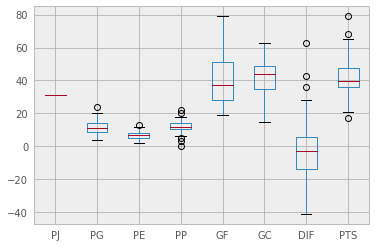

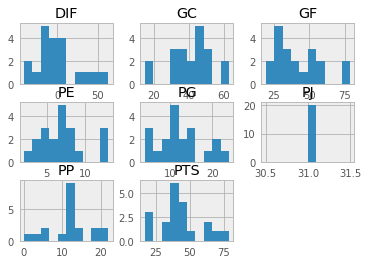

In [7]:
print(df.describe())
# Sacar las distribuciones de cada columna
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
df.boxplot()
df.hist()



In [57]:
# Guardar a fichero
df.to_csv("datasets/equipos.csv", encoding='utf-8', index=False)


In [58]:
! pwd
! ls -altr 
! head -3 equipos.csv

/home/jovyan/work/machine-learning/ejercicios
total 120
drwxrwxr-x 9 jovyan  1000  4096 Apr 12 13:43 ..
-rw-r--r-- 1 jovyan users 41242 Apr 12 14:36 Ejercicio 0 - Manejo DataFrame.ipynb
drwxr-xr-x 2 jovyan users  4096 Apr 12 14:38 .ipynb_checkpoints
-rw-r--r-- 1 jovyan users 58116 Apr 12 14:41 Ejercicio 0 - Soluciones.ipynb
drwxr-xr-x 3 jovyan users  4096 Apr 12 14:41 .
-rw-r--r-- 1 jovyan users   675 Apr 12 14:42 equipos.csv
Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
Barcelona,31,24,7,0,79,16,63,79
Atlético Madrid,31,20,8,3,51,15,36,68


In [59]:
#Coger las columnas
df.columns

Index(['Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS'], dtype='object')

In [4]:
# Coger los dos primeros campos
df.head(2)

,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
0,Barcelona,31,24,7,0,79,16,63,79
1,Atlético Madrid,31,20,8,3,51,15,36,68


In [16]:
# Coger una columna
df.Equipo.tail(5)

15        Alavés
16       Levante
17     Deportivo
18    Las Palmas
19        Málaga
Name: Equipo, dtype: object

In [8]:
# Crear una columna
df["Posicion"] = range(1,21)
df

,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS,Posicion
0,Barcelona,31,24,7,0,79,16,63,79,1
1,Atlético Madrid,31,20,8,3,51,15,36,68,2
2,Valencia,31,20,5,6,59,31,28,65,3
3,Real Madrid,31,19,7,5,77,34,43,64,4
4,Betis,31,15,4,12,52,53,-1,49,5
5,Villarreal,31,14,5,12,41,37,4,47,6
6,Sevilla,31,14,4,13,39,50,-11,46,7
7,Girona,31,12,8,11,44,48,-4,44,8
8,Celta,31,12,7,12,50,43,7,43,9
9,Eibar,31,11,7,13,36,45,-9,40,10


In [13]:
# Coger rango de celdas por su posicion
df.iloc[0:5,0:3]

,Equipo,PJ,PG
0,Barcelona,31,24
1,Atlético Madrid,31,20
2,Valencia,31,20
3,Real Madrid,31,19
4,Betis,31,15


In [38]:
# Seleccionar filas según condiciones
# Coger solo aquellos equipos con mas goles a favor que en contra
df.loc[df['GF'] > df['GC']]


0      True
1      True
2      True
3      True
4     False
5      True
6     False
7     False
8      True
9     False
10     True
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [29]:
# Primera fila
df.iloc[0]


{'DIF': 63,
 'Equipo': 'Barcelona',
 'GC': 16,
 'GF': 79,
 'PE': 7,
 'PG': 24,
 'PJ': 31,
 'PP': 0,
 'PTS': 79}

In [32]:
# Volcar elemento a dicccionario 
dict = df.iloc[0].to_dict()
print(dict)

{'Equipo': 'Barcelona', 'PJ': 31, 'PG': 24, 'PE': 7, 'PP': 0, 'GF': 79, 'GC': 16, 'DIF': 63, 'PTS': 79}


In [46]:
# Creamos un nuevo elemento, tambien vía diccionario
# Primero creamos un diccionario
nuevo_equipo = {'Equipo': 'Broncos de Denver',
                'PJ': 1,
                'PG': 0, 
                'PE': 0,
                'PP': 1,
                'GF': 7, 
                'GC': 1, 
                'DIF': 6,
                'PTS': 3
               }


# Creamos un dataframe del dccionario
df_new_team = pd.DataFrame(nuevo_equipo, index=['21',])


df_new_team

,DIF,Equipo,GC,GF,PE,PG,PJ,PP,PTS
21,6,Broncos de Denver,1,7,0,0,1,1,3


In [48]:
# Concatenamos el nuevo diccionario
pd.concat([df, df_new_team], ignore_index=True)

,DIF,Equipo,GC,GF,PE,PG,PJ,PP,PTS
0,63,Barcelona,16,79,7,24,31,0,79
1,36,Atlético Madrid,15,51,8,20,31,3,68
2,28,Valencia,31,59,5,20,31,6,65
3,43,Real Madrid,34,77,7,19,31,5,64
4,-1,Betis,53,52,4,15,31,12,49
5,4,Villarreal,37,41,5,14,31,12,47
6,-11,Sevilla,50,39,4,14,31,13,46
7,-4,Girona,48,44,8,12,31,11,44
8,7,Celta,43,50,7,12,31,12,43
9,-9,Eibar,45,36,7,11,31,13,40


### Ejercicio.
 
 - Añadir una columna resultado, que tenga los valores
 
 "Champions League" , para los 4 primeros
 "Europa League"    , Para los 2 siguientes
 "Descenso"         , para los 4 últimos
 "Zona fría"        , para los demas.
